## Exercise 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(23)
from functions_albert import gini 
import seaborn as sns
import quantecon as qe   
import statsmodels.api as sm

In [2]:
# Part a
N = 100
x_2 = np.random.normal(loc=0,scale=1,size=N)

# sigma^2=25 so sigma=5, which is what we use for the scale input 
e = np.random.normal(loc=0,scale=5,size=N)

y = 2 + (1/2) * x_2 + e

# Importing statsmodel which works out OLS 
# Add a constant term to the independent variable matrix as not having a constant may add bias into the equation
X_with_intercept = sm.add_constant(x_2)

model = sm.OLS(y, X_with_intercept)

results = model.fit()

# Store beta_hat (estimated coefficients)
beta_hat = results.params
beta_hat_0 = round(results.params[0], 2)
beta_hat_1 = round(results.params[1], 2)
# Print the estimated coefficients
print(f"Estimated Coefficients are beta_0 is {beta_hat_0} and beta_1 {beta_hat_1}.")

Estimated Coefficients are beta_0 is 1.6 and beta_1 0.48.


In [3]:
# Part b
T = 10000
N = 100
beta_hat_0_list = []
beta_hat_1_list = []
for t in range(T):
    x_2 = np.random.normal(loc=0,scale=1,size=N)
    e = np.random.normal(loc=0,scale=5,size=N)

    y = 2 + (1/2) * x_2 + e

    X_with_intercept = sm.add_constant(x_2)
    model = sm.OLS(y, X_with_intercept)

    results = model.fit()
    beta_hat_0_list.append(results.params[0])
    beta_hat_1_list.append(results.params[1])


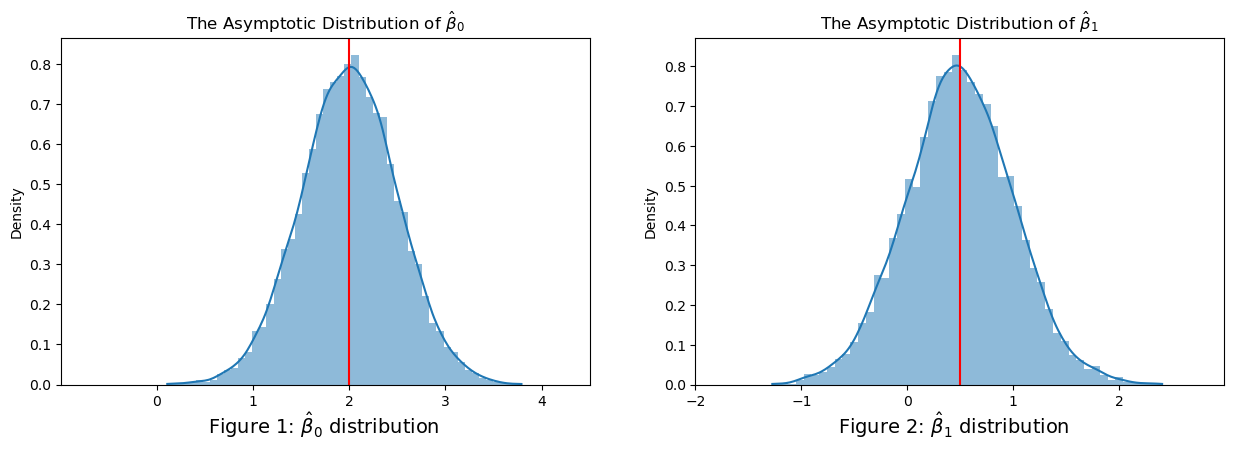

In [4]:
# Plotting the distribution and finding the mean values
b_hat_0_mean = np.mean(beta_hat_0_list)
b_hat_1_mean = np.mean(beta_hat_1_list)

fig, axes = plt.subplots(1, 2, figsize=(15, 4.5))

sns.histplot(x=beta_hat_0_list, ax=axes[0], kde=True, stat='density', linewidth=0, bins=50)
axes[0].axvline(b_hat_0_mean, color='red', linestyle='-')
axes[0].set_title(r"The Asymptotic Distribution of $\hat{\beta}_0$")
axes[0].set_xlim(-.99,4.5)

sns.histplot(x=beta_hat_1_list, ax=axes[1], kde=True, stat='density', linewidth=0, bins=50)
axes[1].axvline(b_hat_1_mean, color='red', linestyle='-')
axes[1].set_title(r"The Asymptotic Distribution of $\hat{\beta}_1$")
axes[1].set_xlim(-2,2.99)

fig.text(0.3, 0, r"Figure 1: $\hat{\beta}_0$ distribution", ha='center', ma='left', size=14)
fig.text(0.72, 0, r"Figure 2: $\hat{\beta}_1$ distribution", ha='center', ma='left', size=14)
plt.show()


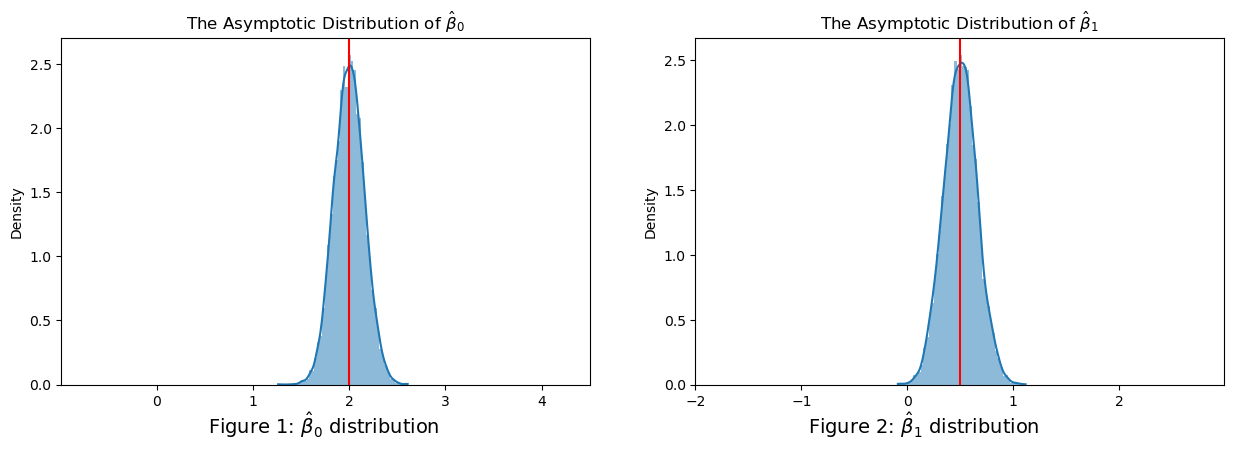

In [5]:
# Part c
# Changing N=1000
T = 10000
N = 1000
beta_hat_0_list = []
beta_hat_1_list = []
for t in range(T):
    x_2 = np.random.normal(loc=0,scale=1,size=N)
    e = np.random.normal(loc=0,scale=5,size=N)

    y = 2 + (1/2) * x_2 + e

    X_with_intercept = sm.add_constant(x_2)
    model = sm.OLS(y, X_with_intercept)

    results = model.fit()
    beta_hat_0_list.append(results.params[0])
    beta_hat_1_list.append(results.params[1])
# Plotting the distribution and finding the mean values using the same x limits
b_hat_0_mean = np.mean(beta_hat_0_list)
b_hat_1_mean = np.mean(beta_hat_1_list)

fig, axes = plt.subplots(1, 2, figsize=(15, 4.5))

sns.histplot(x=beta_hat_0_list, ax=axes[0], kde=True, stat='density', linewidth=0, bins=50)
axes[0].axvline(b_hat_0_mean, color='red', linestyle='-')
axes[0].set_title(r"The Asymptotic Distribution of $\hat{\beta}_0$")
axes[0].set_xlim(-.99,4.5)


sns.histplot(x=beta_hat_1_list, ax=axes[1], kde=True, stat='density', linewidth=0, bins=50)
axes[1].axvline(b_hat_1_mean, color='red', linestyle='-')
axes[1].set_title(r"The Asymptotic Distribution of $\hat{\beta}_1$")
axes[1].set_xlim(-2,2.99)

fig.text(0.3, 0, r"Figure 1: $\hat{\beta}_0$ distribution", ha='center', ma='left', size=14)
fig.text(0.7, 0, r"Figure 2: $\hat{\beta}_1$ distribution", ha='center', ma='left', size=14)
plt.show()

By using the same limits for the x axis we can see what the difference is by increasing N. $\mathbb{E}(\hat{\beta}_{\text{OLS}})$ is the same for both, however by increasing N it decreases the variance of the distribution, this can be seen by the tighter grouping around the mean.

## Exercise 2

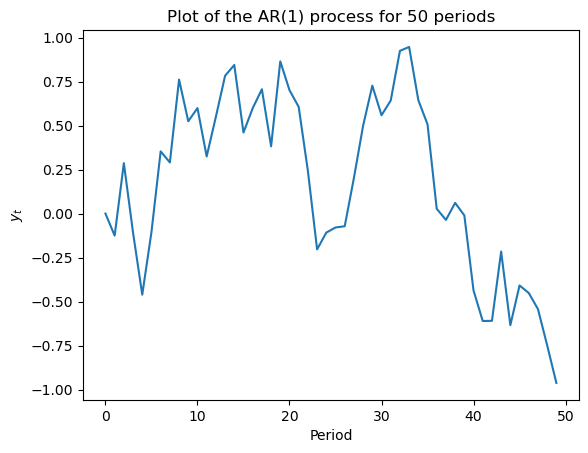

In [6]:
# Part a
def ar_1_sim(T=50,rho=0.95,y0=0,a=0,sigma_e=0.25):
    ''' 
    ar_1_sim simulates for T periods an AR(1) process of the following form:
                y_t+1 = a + rho*y_t + e_t
                where e_t ~ N (0,sigma_e)
    '''
    y = np.empty(T)
    y[0] = y0
    for i in range(1,T):
        e = np.random.normal(0,sigma_e,1) 
        y[i] = a+ rho*y[i-1]+e
   
    return y

# Making the plot
y_values = ar_1_sim()
x_values = list(range(50))

plt.plot(x_values, y_values)

plt.xlabel('Period')
plt.ylabel(f'$y_t$')
plt.title('Plot of the AR(1) process for 50 periods')

# Show plot
plt.show()

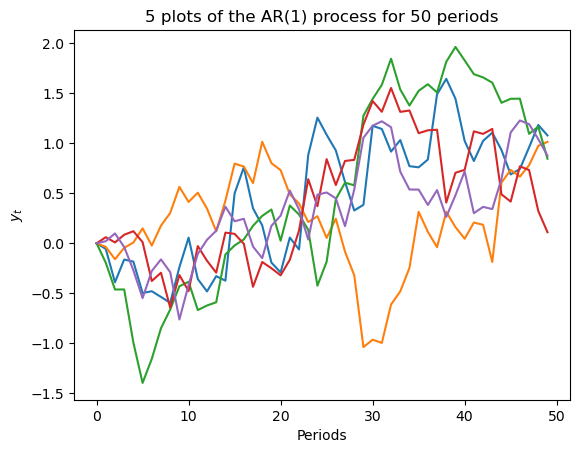

In [7]:
# Part b
def multiple_ar_1_sim(N, T):
    empty_matrix = np.zeros((N, T))
    for n in range(N):
        new_ar_1_process = ar_1_sim()
        empty_matrix[n,:] = new_ar_1_process
    return empty_matrix

# To keep the ar_1 values the same
ar_1 = multiple_ar_1_sim(5, 50)
x_values = list(range(50))
for n in range(5):
    y_values = ar_1[n,:]
    plt.plot(x_values, y_values)
plt.xlabel('Periods')
plt.ylabel(f'$y_t$')
plt.title('5 plots of the AR(1) process for 50 periods');


In [8]:
# Part c
# Calculating the stationary values, sample mean, and sample variance
rho = 0.95
def stationarity(rho, a, sigma_e):
    if abs(rho)>=1:
        return 'The stochastic process is not stationary, and the variance of the the time series explodes'
    else:
        mu = round(a/(1-rho), 2)
        v = round((sigma_e**2)/(1-(rho**2)), 2)
        return mu, v

sample_mean = round(np.mean(ar_1), 2)
sample_variance = round(np.var(ar_1), 2)
mu, v = stationarity(0.95, 0, 0.25)

print(f"The sample mean is {sample_mean}, and the sample variance is {sample_variance}.")
print(f"The stochastic process is stationary, and the stationary mean is {mu}, \
while the stationary variance is {v}.")

The sample mean is 0.39, and the sample variance is 0.44.
The stochastic process is stationary, and the stationary mean is 0.0, while the stationary variance is 0.64.


In [9]:
# Part d
def multiple_ar_1_sim(N, T):
    empty_matrix = np.zeros((N, T))
    for n in range(N):
        new_ar_1_process = ar_1_sim(T=1000)
        empty_matrix[n,:] = new_ar_1_process
    return empty_matrix

# To keep the ar_1 values the same
ar_1 = multiple_ar_1_sim(10000, 1000)

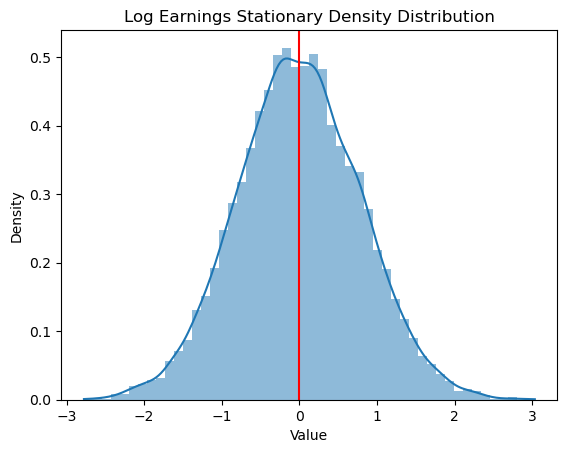

In [10]:
# Plot density distribution of the last column
sns.histplot(ar_1[:, -1], kde=True, stat='density', linewidth=0, bins=50)

plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Log Earnings Stationary Density Distribution')
plt.axvline(np.mean(ar_1[:,-1]), color='red', linestyle='-')
plt.show()

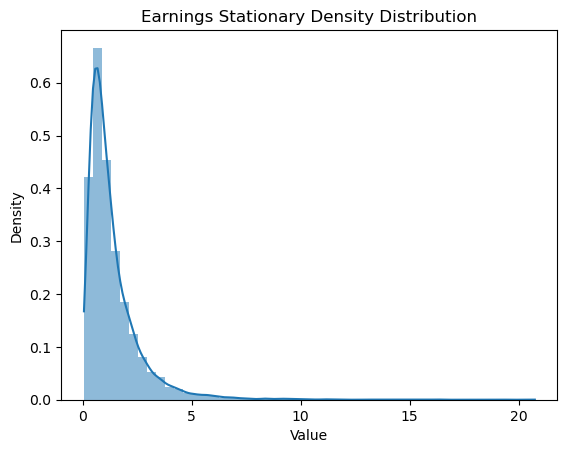

In [11]:
# Plot density distribution of the exponential last column
sns.histplot(np.exp(ar_1[:, -1]), kde=True, stat='density', linewidth=0, bins=50)

plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Earnings Stationary Density Distribution')
plt.show()

In [12]:
print(f"The stationary density distribution of log earnings looks like a normal distribution around 0. While the stationary \
\ndensity distribution of earnings represents a log normal distribution.")

The stationary density distribution of log earnings looks like a normal distribution around 0. While the stationary 
density distribution of earnings represents a log normal distribution.


In [13]:
# Part e
mu = round(np.mean(ar_1[:, -1]), 3)
v = round(np.var(ar_1[:, -1]), 3)
gini_coeff = round(gini(np.exp(ar_1[:, -1])), 3)

print(f"The stationary mean of log earnings is {mu}, and the stationary variance of log earnings is {v}.")
print(f"The gini coefficient of exponentiated earnings is {gini_coeff}.")

The stationary mean of log earnings is -0.006, and the stationary variance of log earnings is 0.627.
The gini coefficient of exponentiated earnings is 0.427.


In [14]:
print(f"From an equation used in part c the stationary mean is {round(stationarity(0.95, 0, 0.25)[0], 2)}, \
while the stationary variance is {round(stationarity(0.95, 0, 0.25)[1], 2)}. While using the last column as the stationary \
value we have worked out the stationary mean to be {mu} and the stationary variance to be {v}. \
Therefore we can see that the sample is a close approximation of the true values of the stationary mean and variance. \n\
And because we have exponentiated log of earning we get the earnings, and the gini coefficient is {gini_coeff}. This suggests \
moderate income inequality. While it's not extremely high, it's also not low.")

From an equation used in part c the stationary mean is 0.0, while the stationary variance is 0.64. While using the last column as the stationary value we have worked out the stationary mean to be -0.006 and the stationary variance to be 0.627. Therefore we can see that the sample is a close approximation of the true values of the stationary mean and variance. 
And because we have exponentiated log of earning we get the earnings, and the gini coefficient is 0.427. This suggests moderate income inequality. While it's not extremely high, it's also not low.


In [15]:
# Part f
# Importing a package to stop the warning of the API of rouwenhorst being changed
import warnings 
warnings.filterwarnings('ignore')

markov_chain = qe.rouwenhorst(n=3, rho=0.95, sigma=0.25, mu=0)
transition_matrix = np.around(markov_chain.P, decimals = 3)
stationary_distribution = markov_chain.stationary_distributions

print(f"The resulting transition matrix is: \n {transition_matrix}")
print(f"The resulting stationary distribution is: \n {stationary_distribution}")

The resulting transition matrix is: 
 [[0.951 0.049 0.001]
 [0.024 0.951 0.024]
 [0.001 0.049 0.951]]
The resulting stationary distribution is: 
 [[0.25 0.5  0.25]]


## Exercise 3

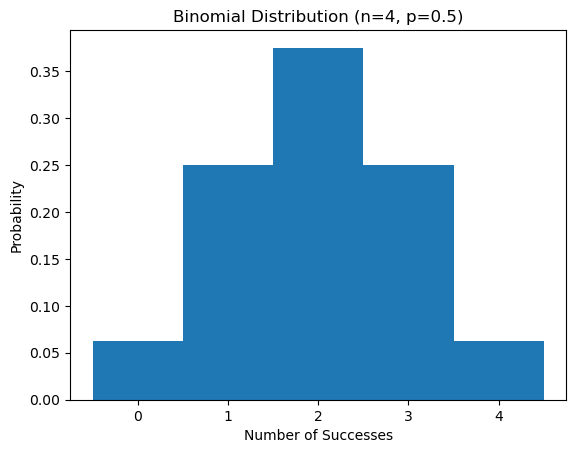

In [16]:
# Part a
n = 4
p = 0.5

# Simulate binomial distribution
binomial_data = np.random.binomial(n, p, size=1000000)

plt.hist(binomial_data, bins=np.arange(0, n+2)-0.5, density=True, linewidth=0)
plt.xlabel('Number of Successes')
plt.ylabel('Probability')
plt.title('Binomial Distribution (n=4, p=0.5)')

plt.show()

In [17]:
# Part b
def g(x):
    return x**2

N = 1000000

X = np.random.poisson(lam=2,size=N)
g_X = g(X)

# Computing the sample average of g(X)
mc_integr_1 = np.mean(g_X)

print('Monte Carlo Integration of g(x)')
print('E[g(x)] =', round(mc_integr_1,6))

print(f"g(E(x)) = {round(g(np.mean(X)),6)}")
print('There is a difference because we square the values then take the mean in the monte-carlo integration, \
compared to taking the \nmean then squaring it.')


Monte Carlo Integration of g(x)
E[g(x)] = 5.988415
g(E(x)) = 3.990242
There is a difference because we square the values then take the mean in the monte-carlo integration, compared to taking the 
mean then squaring it.


## Exercise 4

In [18]:
# Part a
mu = 7.5
sigma = 0.8
N = 100000
y = np.random.lognormal(mean=mu, sigma=sigma, size=N)
avg_y = round(np.mean(y), 3)
var_y = round(np.var(y), 3)
gini_y = round(gini(y), 3)
print(f"The average individual's income is {avg_y}, the variance of individual's income is {var_y}, and the gini coefficient \
of \nindividual's income is {gini_y}.")

The average individual's income is 2502.023, the variance of individual's income is 5695880.864, and the gini coefficient of 
individual's income is 0.429.


In [19]:
# Part b
c = (y)**(0.8) + (0.5)*y + 500
avg_c = round(np.mean(c), 3)
var_c = round(np.var(c), 3)
gini_c = round(gini(c), 3)
print(f"The average of consumption is {avg_c}, the variance of consumption is {var_c}, and the gini coefficient \
of consumption is {gini_c}.")

The average of consumption is 2247.905, the variance of consumption is 2391267.639, and the gini coefficient of consumption is 0.316.


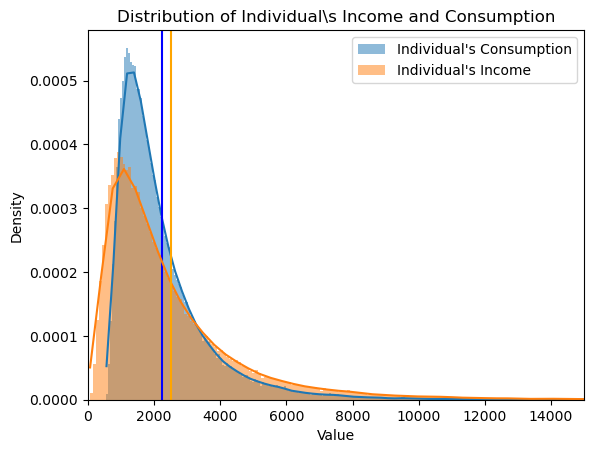

In [20]:
# Part c
sns.histplot(c, kde=True, stat='density', linewidth=0, label='Individual\'s Consumption')
plt.axvline(avg_c, color='blue', linestyle='-')

sns.histplot(y, kde=True, stat='density', linewidth=0, label='Individual\'s Income')
plt.axvline(avg_y, color='orange', linestyle='-')

plt.title('Distribution of Individual\s Income and Consumption')
plt.xlabel('Value')
plt.xlim(0,15000)
plt.legend()

plt.show()